<a href="https://colab.research.google.com/github/Emyfoton/MetodosI_EmilyCastillo_SebastianRodriguez/blob/main/M%C3%ADnimos_cuadrados.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

El punto solución aproximado (mínimos cuadrados) es: [1.42857143 0.42857143]


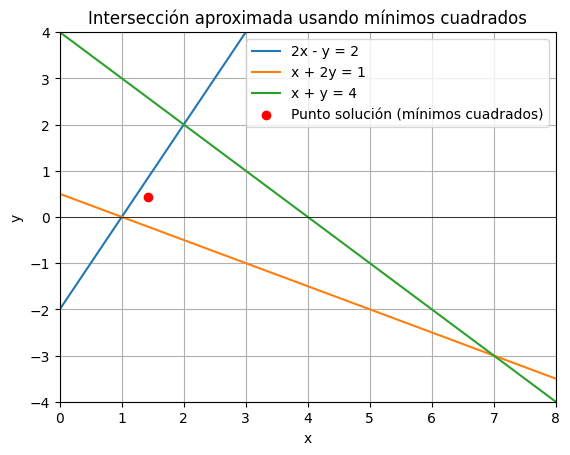

In [3]:
#Punto 1

#(a)

import numpy as np
import matplotlib.pyplot as plt

A = np.array([[2, -1], [1, 2], [1, 1]])
b = np.array([2, 1, 4])

AT = A.T
ATA = np.dot(AT, A)
ATb = np.dot(AT, b)
x_sol = np.linalg.solve(ATA, ATb)

print("El punto solución aproximado (mínimos cuadrados) es:", x_sol)

x_vals = np.linspace(-1, 8, 100)
y1 = 2 * x_vals - 2
y2 = (1 - x_vals) / 2
y3 = 4 - x_vals

plt.plot(x_vals, y1, label='2x - y = 2')
plt.plot(x_vals, y2, label='x + 2y = 1')
plt.plot(x_vals, y3, label='x + y = 4')

plt.scatter(x_sol[0], x_sol[1], color='red', label='Punto solución (mínimos cuadrados)')

plt.xlim(0, 8)
plt.ylim(-4, 4)
plt.axhline(0, color='black',linewidth=0.5)
plt.axvline(0, color='black',linewidth=0.5)
plt.xlabel('x')
plt.ylabel('y')
plt.title('Intersección aproximada usando mínimos cuadrados')
plt.legend()
plt.grid(True)
plt.show()


In [4]:
#(b)

h = 0.01
x_vals = np.arange(-5, 5, h)
y_vals = np.arange(-5, 5, h)

min_dist = float('inf')
min_x = 0
min_y = 0

def distancia(A, b, x):
    return np.linalg.norm(np.dot(A, x) - b)

for x in x_vals:
    for y in y_vals:
        x_vec = np.array([x, y])
        dist = distancia(A, b, x_vec)

        if dist < min_dist:
            min_dist = dist
            min_x, min_y = x, y

print(f"Menor distancia: {min_dist} ")

min_dist_mc = distancia(A, b, x_sol)
print(f"Distancia mínimos cuadrados: {min_dist_mc}")


Menor distancia: 2.5354683985409867 
Distancia mínimos cuadrados: 2.5354627641855494


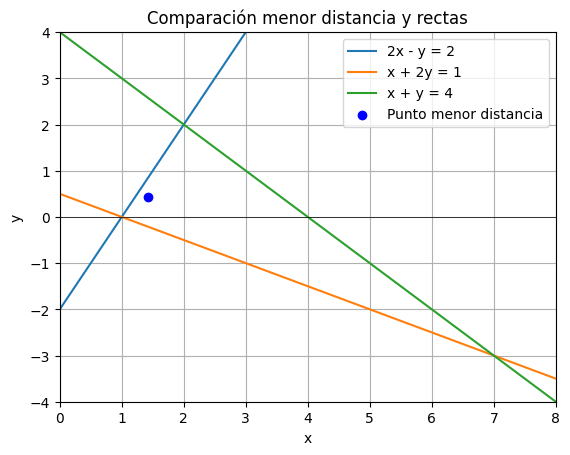

In [5]:
x_vals = np.linspace(-1, 8, 100)

y1 = 2 * x_vals - 2
y2 = (1 - x_vals) / 2
y3 = 4 - x_vals

plt.plot(x_vals, y1, label='2x - y = 2')
plt.plot(x_vals, y2, label='x + 2y = 1')
plt.plot(x_vals, y3, label='x + y = 4')

plt.scatter(min_x, min_y, color='blue', label='Punto menor distancia')
plt.xlim(0, 8)
plt.ylim(-4, 4)
plt.axhline(0, color='black',linewidth=0.5)
plt.axvline(0, color='black',linewidth=0.5)
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.grid(True)
plt.title('Comparación menor distancia y rectas')
plt.show()


Mounted at /content/drive
MinimosCuadratico.txt  MinimosLineal.txt


<function matplotlib.pyplot.show(close=None, block=None)>

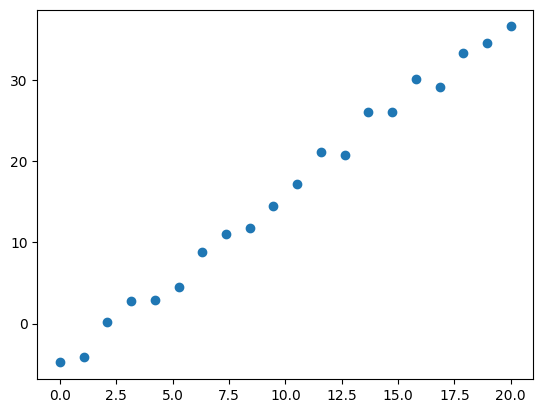

In [ ]:
# Punto 2 (Mínimos cuadrados)

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os
from google.colab import drive
drive.mount('/content/drive', force_remount=True)


os.chdir("/content/drive/MyDrive/Archivos de Métodos")
!ls


file = '/content/drive/MyDrive/Archivos de Métodos/MinimosLineal.txt'
file


data = pd.read_csv(file, sep=" ", header=None)
data.columns = ['x','y']
x = np.array(data['x'])
y = np.array(data['y'])

plt.scatter(x,y)
plt.show

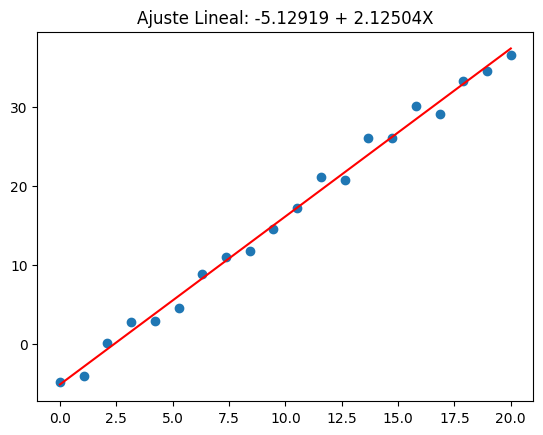

In [ ]:
def GetFit(x,y,n):

  l = x.shape[0]
  b = y

  A = np.ones((l,n+1))

  for i in range(1,n+1):
    A[:,i] = x**i

  # Ajuste
  AT = np.dot(A.T,A)
  bT = np.dot(A.T,b)

  xsol = np.linalg.solve(AT,bT)

  return xsol


def GetModel(x,p):

  y = 0.
  for n in range(len(p)):
    y += p[n]*x**n

  return y

n=1
xsol = GetFit(x,y,n=n)
_x = np.linspace(np.min(x),np.max(x),50)
_y = GetModel(_x,xsol)


plt.scatter(x,y)
plt.plot(_x,_y,color='r')
plt.title("Ajuste Lineal: " + str(round(xsol[0],5)) + " + " + str(round(xsol[1],5))+"X")
plt.show()

In [ ]:
import sympy as sym
X = sym.Symbol('x')
GetModel(X,xsol)

2.12503680800827*x - 5.12918552885297

<function matplotlib.pyplot.show(close=None, block=None)>

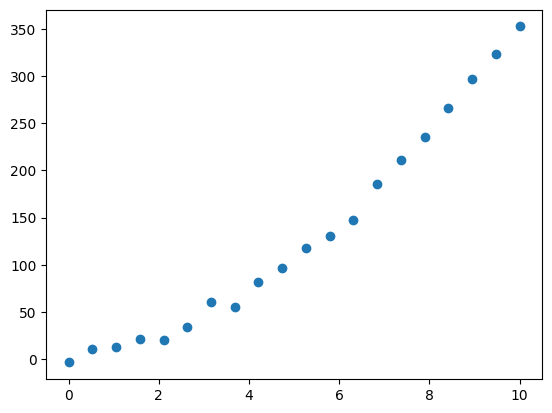

In [ ]:
# Punto 3

file2 = '/content/drive/MyDrive/Archivos de Métodos/MinimosCuadratico.txt'
file2


data = pd.read_csv(file2, sep=" ", header=None)
data.columns = ['x','y']
x2 = np.array(data['x'])
y2 = np.array(data['y'])

plt.scatter(x2,y2)
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

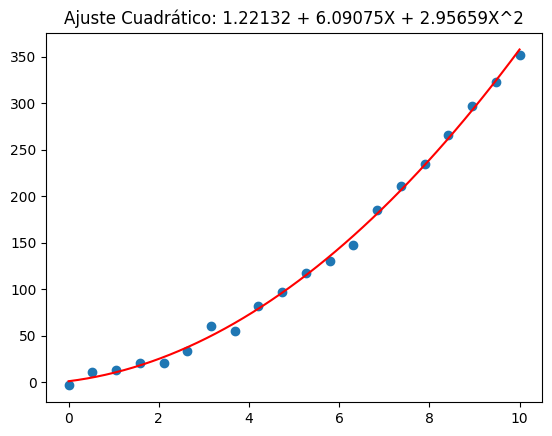

In [ ]:
n=2
xsol2 = GetFit(x2,y2,n=n)
_x2 = np.linspace(np.min(x2),np.max(x2),50)
_y2 = GetModel(_x2,xsol2)


plt.scatter(x2,y2)
plt.plot(_x2,_y2,color='r')
plt.title("Ajuste Cuadrático: " + str(round(xsol2[0],5)) + " + " + str(round(xsol2[1],5)) + "X + " + str(round(xsol2[2],5)) + "X^2")

plt.show

In [ ]:
import sympy as sym
X = sym.Symbol('x')
GetModel(X,xsol2)

2.95658740177386*x**2 + 6.09075204636229*x + 1.22132053617042

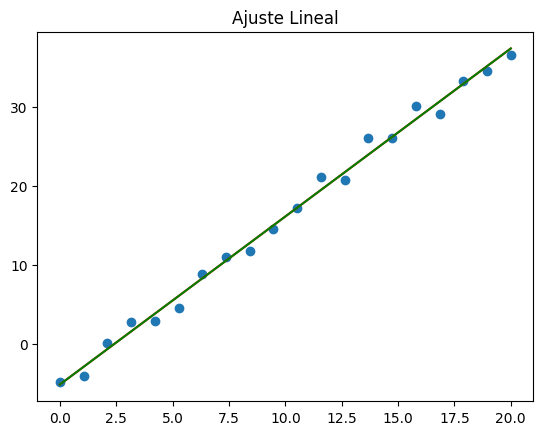

In [ ]:
#Punto 4

from scipy.optimize import curve_fit

def f1(m,x,b):
  return b + m*x

popt = curve_fit(f1,x,y)
plt.scatter(x,y)
plt.plot(_x,_y,color='r')
plt.title("Ajuste Lineal")
_xc = np.linspace(np.min(x),np.max(x),50)
plt.plot(_x,f1(_xc,*popt[0]),color='g')

In [ ]:
# Comparación
popt[0],xsol

(array([ 2.12503681, -5.12918554]), array([-5.12918553,  2.12503681]))

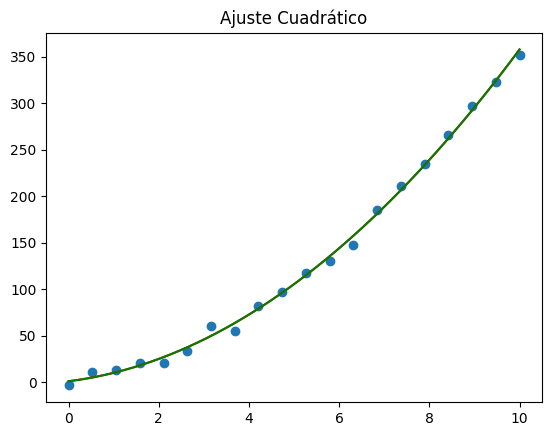

In [ ]:
def f2(x,c,b,a):
  return c + b*x + a*x**2

popt2 = curve_fit(f2,x2,y2)
plt.scatter(x2,y2)
plt.plot(_x2,_y2,color='r')
plt.title("Ajuste Cuadrático")
_xc2 = np.linspace(np.min(x2),np.max(x2),50)
plt.plot(_x2,f2(_xc2,*popt2[0]),color='g')

In [ ]:
#Comparación
popt2[0],xsol2

(array([1.22131863, 6.09075287, 2.95658733]),
 array([1.22132054, 6.09075205, 2.9565874 ]))

In [6]:
#Punto 7
#(a)
import numpy as  np

A= np.array([[3, 1, -1], [1, 2, 0], [0, 1, 0], [1, 1, -1]])
b= np.array([-3, -3, 8, 9])

AT= A.T
ATA= np.dot(AT, A)
ATb= np.dot(AT, b)
x_sul= np.linalg.solve(ATA, ATb)

proywb= np.dot (x_sul, AT)
#print(f"Proyección: {proywb}")
ATA
ATb

array([-3,  8, -6])

In [7]:
#(b)
import numpy as np

u1 = np.array([3, 1, 0, 1])
u2 = np.array([1, 2, 1, 1])
u3 = np.array([-1, 0, 2, -1])

b = np.array([-3, -3, 8, 9])

def gram_schmidt(vectores):
    orto_vectores = []
    for v in vectores:
        for u in orto_vectores:
            v = v - np.dot(v, u) / np.dot(u, u) * u
        orto_vectores.append(v)
    return orto_vectores

vectores = [u1, u2, u3]
orto_vectores = gram_schmidt(vectores)

orto_normales = []
for v in range(len(orto_vectores)):
    v_normalizada = orto_vectores[v] / np.linalg.norm(orto_vectores[v])
    orto_normales.append(v_normalizada)

proyeccion = np.zeros_like(b, dtype=float)

for v in orto_normales:
    proyeccion += np.dot(b, v) * v

In [8]:
print("Base ortonormal:")
for v in orto_normales:
    print(v)

Base ortonormal:
[0.90453403 0.30151134 0.         0.30151134]
[-0.32961713  0.75341057  0.51796977  0.2354408 ]
[ 0.25633581 -0.26982716  0.78249877 -0.49918025]


In [9]:
print("\nProyección de b sobre W:\n", proyeccion)


Proyección de b sobre W:
 [-2.00000000e+00  3.00000000e+00  4.00000000e+00 -1.11022302e-16]


In [10]:
#Punto 8
#Estimación de Parámetros: Mínimos cuadrados

"""
Encontrar la configuración que adopta un sistema de N=50 partículas que interacutan con un potencial
de lennar Jonnes. Use el algoritmo genético para minimizar la energía total del sistema: Use la siguiente definición
de potencial y de energía: (Estos no son métodos de clase , Cuidado!)

"""

def LennardJones(r, epsilon=1, sigma=1):
    """
    Potencial de Lennard-Jones para dos partículas a una distancia r.
    """
    return 4 * epsilon * ((sigma / r)**12 - (sigma / r)**6)

def TotalEnergy(positions, epsilon=1, sigma=1):
    """
    Calcula la energía total de un sistema de partículas en posiciones dadas.
    """
    N = len(positions)
    energy = 0
    for i in range(N):
        for j in range(i + 1, N):
            r = np.linalg.norm(positions[i] - positions[j])  # Distancia entre partículas
            if r != 0:
                energy += LennardJones(r, epsilon, sigma)
    return energy